# **Aula Interativa 1 - MPT**

- Modelos Preditivos e Séries Temporais
- [Prof. Matheus Mendonça](https://www.linkedin.com/in/matheusmendonca/)

## Descrição do problema

Neste exercício, iremos implementar um modelo preditivo para estimar o valor da receita de uma startup em um determinado ano.

## Modelo de regressão linear

Para a análise de regressão do problema proposto, será usado um <a href="https://s3.amazonaws.com/awsmlcourse/dataset/50_Startups.csv">dataset</a> com informações de 50 empresas.

Inicialmente, as bibliotecas básicas para análise serão importadas.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Análise exploratória

O próximo passo é a leitura do *dataset* e a visualização das 10 primeiras linhas.

In [ ]:
# read dataset
df = pd.read_csv('https://pycourse.s3.amazonaws.com/50_Startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
# DICA: pandas profile https://github.com/pandas-profiling/pandas-profiling
# descomente as seguintes linhas para instalar o pacote
# !pip install pandas-profiling
# !pip install --upgrade pandas-profiling

In [ ]:
# descritivo dos dados
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Startup Profit")

In [ ]:
# visualização do relatório inicial
profile

Como é possível perceber após a visualização, o *dataset* possui 3 atributos numéricos contínuos (R&D Spend, Administration e Marketing Spend) e 1 categórico (State).

A seguir, é feita a divisão do *dataset*.

In [ ]:
# divisão em matriz de atributos X e target y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Pré-processamento dos dados

#### Divisão em treinamento e teste

In [ ]:
# divisão em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    test_size=.2,
                                                    stratify=X['State'])

#### Normalização dos dados

In [ ]:
# normalização z-score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# aplica a normalização
ct = ColumnTransformer([("z-score-norm", StandardScaler(), slice(0, 3))])
X_train.iloc[:, :-1] = ct.fit_transform(X_train)
X_test.iloc[:, :-1] = ct.transform(X_test)

In [ ]:
# visualização
X_train.head()

,R&D Spend,Administration,Marketing Spend,State
39,-0.823610,-1.458958,-0.277975,California
7,1.452712,0.813025,1.154996,Florida
17,0.568358,0.796590,0.757454,New York
3,1.801935,-0.162568,1.725990,New York
36,-1.069127,0.141984,-0.026493,Florida


In [ ]:
# visualização
X_test.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.322429,0.499468,2.578631,New York
1,2.254156,1.025430,2.310228,California
16,0.155371,-0.056296,0.582004,California
11,0.717602,-1.138999,0.441462,California
18,0.496202,-0.325883,0.876279,Florida


#### Variáveis categóricas

<img width=500 src="https://pycourse.s3.amazonaws.com/ohe.png">

In [ ]:
# encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# operação de one hot ecoding
ct = ColumnTransformer([("ohe", OneHotEncoder(), [3])],
                       remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

Como podemos perceber, as 3 primeiras colunas de *X* são as *dummy variables* criadas para a variável *State*. As colunas seguintes estão na mesma ordem inicial.

A seguir, a primeira coluna é removida para evitar o problema o problema da criação de *dummy variables*.

In [ ]:
# evitar o dummy variable trap
# resultado semelhante usando o atributo drop de OneHotEncoder
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

### Modelo

Finalizada a etapa de pré-processamento dos dados, é possível iniciar a etapa de treinamento do modelo. A classe usada é denominada `LinearRegression`.

O trecho a seguir importa a classe necessária e realiza o *fit* nos dados de treinamento.

In [ ]:
# Fitting multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predição e Avaliação

Com o modelo de regressão pronto é possível testar o desempenho do modelo na presença de novos dados, isto é, o *dataset* de teste.

O seguinte trecho realiza a predição dos dados de teste.

In [ ]:
# Prediction
y_pred = regressor.predict(X_test)

A raiz do erro quadrático médio também pode ser calculada.

In [ ]:
# RMSE
RMSE = np.sqrt(((y_test - y_pred)**2).mean())
print('RMSE = %.1f' % RMSE)

RMSE = 9946.5


Para fins de comparação, é muito comum usar um modelo padrão (*baseline*) para avaliação de desempenho. Em regressão linear, o *baseline* é um modelo que sempre prediz a média dos valores obervados. Para esse modelo, o RMSE é dado por:

In [ ]:
# RMSE
RMSE_baseline = np.sqrt(((y_test - y_train.mean())**2).mean())
print('RMSE baseline = %.1f' % RMSE_baseline)

RMSE baseline = 55116.0


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-square = %.3f' % r2)

R-square = 0.966


### Seleção de atributos - backward elimination

Uma técnica bastante simples e usada para seleção dos melhores atributos é denominada *backward elimination*. A imagem a seguir apresenta um diagrama explicativo dessa técnica.

<img width=700 src="https://pycourse.s3.amazonaws.com/backward.png">

Para a implementação dessa técnica, iremos usar a biblioteca `statsmodels.formula.api`, que também implementa a regressão linear (OLS, *ordinary least squares*) e faz a estatística do modelo.

Para correto uso dessa biblioteca, é obrigatório inserir o termo constante da regressão $\beta_0$ na matriz *X*. O seguinte trecho faz esse ajuste.

In [ ]:
# building optimal model using backward elimination
import statsmodels.regression.linear_model as sm
from statsmodels.tools.tools import add_constant

# novos X_train e X_test
X_train_sm = add_constant(X_train)
X_test_sm = add_constant(X_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Considerando um nível de significância de 5%, iremos iniciar a modelagem com todos os atributos, conforme __STEP 2__. Em seguida, a variável que tiver a maior probabilidade __P>|t|__ será excluída de X_opt e o processo será reiniciado.

É importante ressaltar que na avaliação que será feita haverá uma nova métrica denominada __Adj. R-squared__, que é uma métrica derivada de __R-squared__ e que tem um fator de penalização para o número de regressores usados. __Adj. R-squared__ é dado por:

$$Adj.~R^2 = 1 - (1-R^2)\frac{n-1}{n-p-1},$$

onde $n$ é o número de amostras e $p$ o número de regressores.

A seguir, será implementada a técnica *backward elimination*.

In [ ]:
# todos os atributos
# i_map = {0: 'constant',
#          1: 'dummy1',
#          2: 'dummy2',
#          3: 'R&D',
#          4: 'Administration',
#          5: 'Marketing'}
X_opt = X_train_sm[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     102.9
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.59e-19
Time:                        21:28:24   Log-Likelihood:                -419.84
No. Observations:                  40   AIC:                             851.7
Df Residuals:                      34   BIC:                             861.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.085e+05   2720.085     39.885      0.000    1.03e+05    1.14e+05
x1          3236.5419   3883.371      0.833      0.410   -4655.418    1.11e+04
x2          1401.9073   3783.882      0.370      0.713   -6287.865    9091.680
x3          3.297e+04   2012.941     16.377      0.000    2.89e+04    3.71e+04
x4         -1949.7496   1691.464     -1.153      0.257   -5387.218    1487.719
x5          2055.9212   2026.220      1.015      0.317   -2061.853    6173.696
==============================================================================
Omnibus:                       17.599   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.120
Skew:                          -1.265   Prob(JB):                     3.51e-06
Kurtosis:                       5.946   Cond. No.                         4.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# remoção do índice 2
X_opt = X_train_sm[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.38e-20
Time:                        21:28:24   Log-Likelihood:                -419.93
No. Observations:                  40   AIC:                             849.9
Df Residuals:                      35   BIC:                             858.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.092e+05   1817.112     60.114      0.000    1.06e+05    1.13e+05
x1          2462.4723   3232.850      0.762      0.451   -4100.562    9025.507
x2          3.304e+04   1978.964     16.694      0.000     2.9e+04    3.71e+04
x3         -1899.6344   1665.137     -1.141      0.262   -5280.042    1480.773
x4          2143.7553   1987.347      1.079      0.288   -1890.774    6178.285
==============================================================================
Omnibus:                       18.392   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.696
Skew:                          -1.288   Prob(JB):                     9.68e-07
Kurtosis:                       6.159   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# remoção do índice 1
X_opt = X_train_sm[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.26e-21
Time:                        21:28:24   Log-Likelihood:                -420.25
No. Observations:                  40   AIC:                             848.5
Df Residuals:                      36   BIC:                             855.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.1e+05   1473.887     74.656      0.000    1.07e+05    1.13e+05
x1          3.292e+04   1961.775     16.782      0.000    2.89e+04    3.69e+04
x2         -1777.7384   1647.737     -1.079      0.288   -5119.504    1564.027
x3          2432.9518   1939.336      1.255      0.218   -1500.203    6366.107
==============================================================================
Omnibus:                       18.555   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.195
Skew:                          -1.267   Prob(JB):                     4.58e-07
Kurtosis:                       6.331   Cond. No.                         2.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# remoção do índice 4
X_opt = X_train_sm[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     264.6
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.20e-22
Time:                        21:28:24   Log-Likelihood:                -420.89
No. Observations:                  40   AIC:                             847.8
Df Residuals:                      37   BIC:                             852.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.1e+05   1477.151     74.491      0.000    1.07e+05    1.13e+05
x1          3.204e+04   1788.526     17.916      0.000    2.84e+04    3.57e+04
x2          3252.0009   1788.526      1.818      0.077    -371.897    6875.899
==============================================================================
Omnibus:                       17.339   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.107
Skew:                          -1.231   Prob(JB):                     3.53e-06
Kurtosis:                       6.001   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# remoção do índice 5
X_opt = X_train_sm[:, [0, 3]]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     495.9
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.08e-23
Time:                        21:28:24   Log-Likelihood:                -422.60
No. Observations:                  40   AIC:                             849.2
Df Residuals:                      38   BIC:                             852.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.1e+05   1521.312     72.328      0.000    1.07e+05    1.13e+05
x1          3.388e+04   1521.312     22.268      0.000    3.08e+04     3.7e+04
==============================================================================
Omnibus:                       16.742   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.553
Skew:                          -1.141   Prob(JB):                     2.83e-06
Kurtosis:                       6.181   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para `X_opt = X[:, [0, 3]]`, todos os coeficientes estão dentro do nível de significância especificado. No entanto, __Adj. R-squared__ diminui em relação ao modelo com `X_opt = X[:, [0, 3, 5]]`, que por sua vez possuia um de seus coeficientes ligeiramente acima do nível de significância de 5%. 

Desse modo, iremos comparar o desempenho do modelo para esses dois casos.

In [ ]:
# X optimal - opção 1
X_train = X_train_sm[:, [0, 3, 5]]
X_test = X_test_sm[:, [0, 3, 5]]

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# RMSE
rmse = np.sqrt(((y_test - y_pred)**2).mean())
print('RMSE = %.1f' % rmse)

# R2
r2 = r2_score(y_test, y_pred)
print('R-square = %.3f' % r2)

RMSE = 8471.5
R-square = 0.976


In [ ]:
# X optimal - opção 2
X_train = X_train_sm[:, [0, 3]]
X_test = X_test_sm[:, [0, 3]]

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# RMSE
rmse = np.sqrt(((y_test - y_pred)**2).mean())
print('RMSE = %.1f' % rmse)

# R2
r2 = r2_score(y_test, y_pred)
print('R-square = %.3f' % r2)

RMSE = 8733.8
R-square = 0.974


Os resultados monstram que o melhor modelo é o `X_opt = X[:, [0, 3, 5]]`, ou seja, é o modelo que possui apenas __R&D Spend__ e __Marketing Spend__ como variáveis descritoras de __Profit__, ou seja, o quanto é gasto com administração e a localização da empresa não influenciam na receita.

Esse novo modelo apresenta um RMSE de teste aproximadamente 15% menor que o modelo inicial proposto. Além disso, o coeficiente $R^2$ também aumentou cerca de 1%.

## Random Forest

Iremos ver como o Random Forest pode ser utilizado para o mesmo problema para seleção de atributos.

In [ ]:
# recuperando os valores originais
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    test_size=.2,
                                                    stratify=X['State'])

In [ ]:
# label encoder
from sklearn.preprocessing import OrdinalEncoder

# operação de one hot ecoding
ct = ColumnTransformer([("ordinal_encoder", OrdinalEncoder(), ['State'])])
X_train.iloc[:, -1] = ct.fit_transform(X_train)
X_test.iloc[:, -1] = ct.transform(X_test)

In [ ]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,State
39,38558.51,82982.09,174999.30,0.0
7,130298.13,145530.06,323876.68,1.0
17,94657.16,145077.58,282574.31,2.0
3,144372.41,118671.85,383199.62,2.0
36,28663.76,127056.21,201126.82,1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# modelo
rf_model = RandomForestRegressor()

In [ ]:
# fit nos dados de treino
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

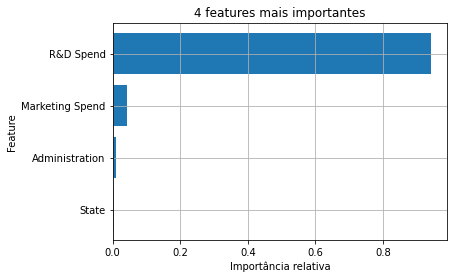

In [ ]:
# importâncias das features
fp = rf_model.feature_importances_
n = 4
i = np.argsort(fp)[-n:]
cols = X_train.columns
plt.barh(cols[i], fp[i])
plt.grid()
plt.title(f"{n} features mais importantes")
plt.xlabel("Importância relativa")
plt.ylabel("Feature")
plt.show()

In [ ]:
# predição
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [ ]:
# erro de treino e teste
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)

print(f"RMSE de treino: {np.sqrt(mse_train)}")
print(f"RMSE de teste: {np.sqrt(mse_test)}")

RMSE de treino: 4252.015002443821
RMSE de teste: 10682.90201170051


In [ ]:
# grid search e validação cruzada

# número de árvores
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 800, num = 5)]

# número de atributos em cada divisão
max_features = ['auto', 'sqrt']

# profundidade máxima de cada árvore
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

# número mínimo de amostras para divisão
min_samples_split = [2, 5, 10]

# número mínimo de observações em uma folha
min_samples_leaf = [1, 2, 4]

# grid de busca: 5*2*6*3*3 = 540 instâncias
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# instanciando o grid search
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                           cv = 5, n_jobs = -1, verbose = 2,
                           scoring='neg_mean_squared_error')

In [ ]:
# fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 19.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# melhores parametros
grid_search.best_params_

{'max_depth': 77,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [ ]:
# melhor modelo
best_model = grid_search.best_estimator_

In [ ]:
# predição
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

In [ ]:
# erro de treino e teste
mse_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)

print(f"RMSE de treino: {np.sqrt(mse_train)}")
print(f"RMSE de teste: {np.sqrt(mse_test)}")

RMSE de treino: 4070.944327380957
RMSE de teste: 10645.796519225987
